# 3.1. K-Mean-Clustering

>## <ins>Table of contents</ins>
>* [**3.1.1. Clusteranalyse und K-Means**](#3_1_1)
    * [**Wie funktioniert die K-Means-Clusteranalyse?**](#3_1_1_1)
>* [**3.1.2. Evaluation**](#3_1_2)
>* [**3.1.3. K-Means-Initialisierung**](#3_1_3)


#### `YouTube videos`
>- [K Means Clustering Algorithm](https://youtu.be/KzJORp8bgqs?si=yKp6XnLV8WJYNWxO)
>- [K Means Clustering Explained](https://youtu.be/4b5d3muPQmA?si=t8MlQn1g3dAT4jmQ)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 3.1.1. Clusteranalyse und K-Means <a name="3_1_1"></a>

**1. Clusteranalyse**
   - `Ziel`: Partitionierung der Datenmenge $E = {x^{(1)}, ..., x^{(m)}}$ in Teilmengen $E_1,...,E_k$, so dass die Datenpunkte in jedem $E_i$ zueinander ähnlich sind $(i = 1,..., k)$, wohingegen die Datenpunkte in verschiedenen $E_i$, $E_j$ zueinander unähnlich sind $(i, j = 1,..., k, i ∕= j)$.
   - Die Datenpunkten in $E$ haben keine Klassifikation.
   - `Hauptaufgabe`: Finden einer Menge von Klassen und einer Zuordnung von Klassen zu Datenpunkten.


    x1   x2
0  2.0  3.0
1  4.0  4.2
2  2.8  2.1
3  1.9  2.0
4  4.1  3.2
5  3.5  3.5
6  3.8  4.1
7  2.0  1.9
8  2.9  3.1
9  4.0  3.9


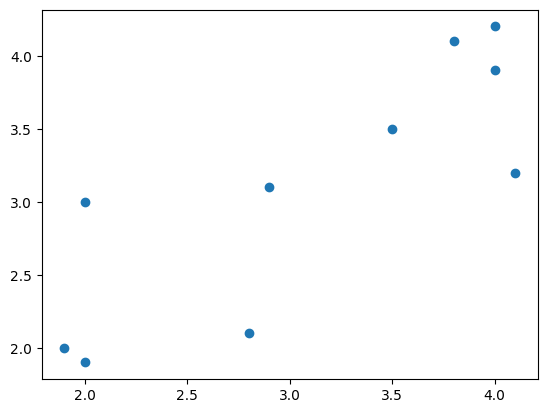

In [88]:
# Erstellen Sie den DataFrame
E_1 = pd.DataFrame({
    'x1': [2, 4, 2.8, 1.9, 4.1, 3.5, 3.8, 2, 2.9, 4],
    'x2': [3, 4.2, 2.1, 2, 3.2, 3.5, 4.1, 1.9, 3.1, 3.9]
})

# Ausgabe des DataFrames
print(E_1)

X = E_1.values
plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

### Wie funktioniert die K-Means-Clusteranalyse? <a name="3_1_1_1"></a>

Der **K-Means-Clustering** ist der klassische Algorithmus der Clusteranalyse, der konzeptuell dem KNN-Algorithmus für überwachtes Lernen ähnelt. Neben einem Datensatz `E` benötigt der Algorithmus die Spezifikation der Anzahl der Cluster `k`, die gelernt werden sollen.

Die Zeile `KMeans(n_clusters=3,n_init=10).fit(X)` führt eine K-Means-Clusteranalyse auf den Daten in `X` durch.

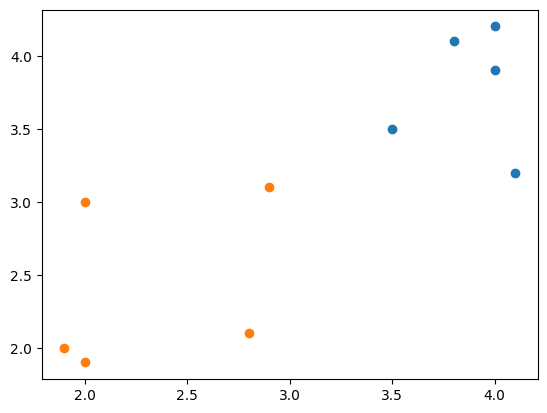

In [89]:
from sklearn.cluster import KMeans

clust = KMeans(n_clusters=2,n_init=10).fit(X)
y = clust.predict(X)

plt.figure()

plt.scatter(X[y==0].T[0], X[y==0].T[1])
plt.scatter(X[y==1].T[0], X[y==1].T[1])
#plt.scatter(X[y==2].T[0], X[y==2].T[1])

plt.show()

![image.png](./dataset/K-Means-Clusteranalyse2.PNG)

Hier ist, was jeder Teil tut:
- `KMeans(n_clusters=3,n_init=10)`: Dies instanziiert das KMeans-Objekt. `n_clusters=3` gibt an, dass der Algorithmus versuchen sollte, die Daten in drei Gruppen (oder "Cluster") zu teilen. `n_init=10` bedeutet, dass der K-Means-Algorithmus mit 10 verschiedenen zufälligen Initialisierungen ausgeführt wird, und die beste Lösung in Bezug auf die Intra-Cluster-Varianz wird ausgewählt.
- `.fit(X)`: Dies passt das Modell an die Daten `X`. Das heißt, es führt den eigentlichen K-Means-Algorithmus auf den Daten aus.

**Funktionsweise des K-Means-Clustering-Algorithmus**: 

Der *naive K-Means-Algorithmus* (auch Lloyds Algorithmus genannt) ist eine heuristische Methode, um `E` in `k` Cluster zu unterteilen, sodass die Summe der euklidischen Distanzen von jedem Datenpunkt zu dem Mittelpunkt des ihm zugewiesenen Clusters minimal ist. Der Algorithmus arbeitet iterativ.

1. **Anfang :** Der Algorithmus startet von einer gegebenen Menge von Clustermittelpunkten (auch Zentroiden genannt) ${m_1,...,m_k}$.

>**Auswahl der initialen Zentroiden**: Die initiale Wahl der Zentroiden kann sich stark auf das Endergebnis auswirken. Üblicherweise wählt man hier zufällig gleichverteilt `k` Elemente aus `E` als initiale Zentroiden aus und führt den Algorithmus wiederholt aus, um das bestmögliche Clustering zu erreichen. Man kann Zentroiden auch durch eine bestimmte Methode wie das K-Means++-Verfahren berechnen.

2. **Zuweisung :** Jedem Datenpunkt `x` in `E` wird der Zentroid $m_i$ (i = 1,..., k) zugewiesen, der ihm am nächsten ist (bezüglich der euklidischen Distanz).
3. **Aktualisierung :** Anschließend aktualisieren wir $m_i$ durch den Mittelwert aller $m_i$ zugewiesenen Datenpunkte (i = 1,..., k).
4. **Iteration :** Diese beiden Schritte 2 und 3 werden wiederholt, bis die Zentroiden konvergieren (die Zuordnung der Datenpunkte zu den Zentroiden stabil wird).

>Es ist wichtig zu beachten, dass K-Means ein heuristischer Algorithmus ist, der eine lokale Optimallösung findet. Daher können die Ergebnisse je nach den anfänglichen Schwerpunkten variieren. Aus diesem Grund wird der Algorithmus oft mit verschiedenen anfänglichen Schwerpunkten ausgeführt (wie durch `n_init` angegeben), und die Lösung mit der geringsten Intra-Cluster-Varianz wird ausgewählt.

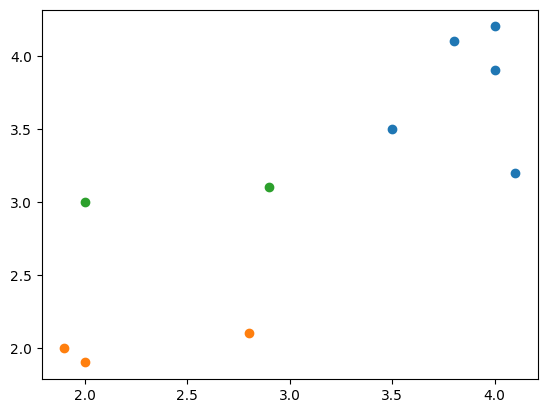

In [93]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

clust = KMeans(n_clusters=3,n_init=10).fit(X_scaled)
y = clust.predict(X_scaled)

plt.figure()

plt.scatter(X[y==0].T[0], X[y==0].T[1])
plt.scatter(X[y==1].T[0], X[y==1].T[1])
plt.scatter(X[y==2].T[0], X[y==2].T[1])

plt.show()

## 3.1.2. Evaluation <a name="3_1_2"></a>

**Qualitätsbewertung von Modellen**: 
Sowohl beim überwachten als auch beim unüberwachten Lernen ist es wichtig, die Qualität des gelernten Modells zu bewerten und es mit anderen Modellen zu vergleichen. <ins>Dazu gibt es beim unüberwachten Lernen, und speziell bei Clusteringproblemen, prinzipiell zwei Möglichkeiten:</ins>

1. **Externe Evaluation**: Bei der externen Evaluation wird das Clustering auf einem zusätzlichen Testdatensatz evaluiert, der vollständige Beispiele (einschließlich der Klassenzugehörigkeit der Datenpunkte) enthalten muss. Dies kann aufwändig sein, da der Datensatz meist manuell annotiert werden muss. Wenn jedoch ein solcher Testdatensatz zur Verfügung steht, können dieselben Metriken zur Evaluation eingesetzt werden wie beim überwachten Lernen, z.B. Genauigkeitsmaß, Präzision, Sensitivität und das F1-Maß.

2. **Interne Evaluation**: Bei der internen Evaluation eines Clusteringalgorithmus wird das eigentliche Optimierungsziel des Clusterings als Kriterium herangezogen. Beim K-Means-Algorithmus versucht man beispielsweise, Zentroiden $(m_1,...,m_k)$ zu finden, sodass die Distanzen aller Datenpunkte in $E$ minimal zu den ihnen zugewiesenen Zentroiden sind. Dies wird formal durch das **Verzerrungsmaß** (engl. distortion bzw. Inertia) modelliert.

   Die Verzerrung ist rechnerisch die Summe der quadrierten Distanzen der Datenpunkte zu ihrem nächstgelegenen Clusterzentrum. Formal sieht das wie folgt aus: $$\text{dist}(\text{cluster}, E, m_1,...,m_k) = \sum_{x \in E} ||x - m_{\text{cluster}(x)}||$$

>**Hinweis**
>
>Das direkte Lösen des zur Verzerrung zugehörigen Optimierungsproblems, d.h., das Finden von $\text{cluster}$ und $(m_1,...,m_k)$, so dass $\text{dist}(\text{cluster},E,m_1,...,m_k)$ minimal ist, ist rechnerisch sehr schwer (genauer: es ist ein NP-schweres Problem). Aus diesem Grund versucht der K-Means-Algorithmus auch nur eine Annäherung an das Optimum zu erreichen.



Beispiel 6.
Die gegebenen Informationen beziehen sich auf den K-Means-Algorithmus, eine Methode zur Clusteranalyse in der Datenanalyse. 

1. **Datensatz E**: Der Datensatz `E_1` besteht aus 10 Punkten, die jeweils durch ein Paar von Koordinaten `(x1, x2)` repräsentiert werden.

2. **Zentroiden m1 und m2**: Zentroiden sind die Mittelpunkte der Cluster. In diesem Fall haben wir zwei Zentroiden `m1 = (2.32,2.42)` und `m2 = (3.88,3.78)`.

3. **Cluster-Funktion**: Die Cluster-Funktion weist jedem Datenpunkt `x` in `E` einen Zentroiden `mcluster(x)` zu. In diesem Fall werden die Punkte `x(1), x(3), x(4), x(8), x(9)` dem Cluster 1 (mit Zentroid `m1`) und die Punkte `x(2), x(5), x(6), x(7), x(10)` dem Cluster 2 (mit Zentroid `m2`) zugewiesen.

4. **Verzerrung dist**: Die Verzerrung ist ein Maß für die Gesamtstreuung der Datenpunkte um ihre jeweiligen Zentroiden. Sie wird berechnet als die Summe der quadrierten euklidischen Abstände jedes Datenpunkts von seinem zugeordneten Zentroiden. In diesem Fall beträgt die Verzerrung für das gegebene Clustering etwa 5.367.

5. **Alternatives Clustering**: Ein alternatives Clustering wird vorgeschlagen, bei dem die Zentroiden `m1 = (2.4,2.4)` und `m2 = (3.2,3.2)` sind und der Punkt `x(9)` dem zweiten Cluster zugewiesen wird. Die Verzerrung für dieses alternative Clustering beträgt etwa 7.566.

Die Wahl des Clustering hängt von der spezifischen Anwendung ab, aber im Allgemeinen wird das Clustering mit der geringsten Verzerrung bevorzugt, da es die geringste Gesamtstreuung der Datenpunkte um ihre Zentroiden aufweist. In diesem Fall wäre das erste Clustering vorzuziehen, da es eine geringere Verzerrung aufweist. 

Ich hoffe, das hilft! Lassen Sie mich wissen, wenn Sie weitere Fragen haben.

In [ ]:
# Die Zugehörigkeiten der Punkte zu den Clustern abrufen
labels = kmeans.labels
_
# Die Punkte in jedem Cluster aufrufen
cluster_1_points = E_1[labels == 0]
cluster_2_points = E_1[labels == 1]
cluster_3_points = E_1[labels == 2]

In [111]:
# Die Zentroiden abrufen
centroids = kmeans.cluster_centers_
#m1, m2, m3 = kmeans.cluster_centers_
centroids

array([2.23333333, 2.        ])

In [85]:
#Verzerrungswert
clust.inertia_

6.1925735537681454

```
#Berechnen Sie die Verzerrung

distortion = 0
for i in range(len(E_1)):
    distortion += np.linalg.norm(E_1.iloc[i] - centroids[labels[i]])**2

print("Die Verzerrung beträgt:", distortion)
```

#### Ellenbogenmethode

Falls die korrekte Anzahl an Clustern k für einen Datensatz E nicht bekannt ist (wie in Beispiel 2), so kann der Verzerrungswert auch genutzt werden, um die geeignete Zahl der Cluster zu finden. Eine einfache Methode dazu ist die sogenannte **Ellenbogenmethode** (engl. elbow method). Dazu berechnet man die Verzerrungswerte für eine Reihe verschiedener Clusterzahlen k und stellt diese Werte in einem Diagramm dar. 

Die optimale Clusterzahl findet man dann bei dem k, an dessen Stelle die Kurve "abknickt". Die Interpretation dazu ist, dass hier höhere Clusterzahlen weniger Information enthalten als die Clusterzahl bis zu diesem Punkt. Natürlich ist dies nur eine sehr grobe Heuristik und der Wert ist auch nicht immer eindeutig.


Verzerrungswert: zu k=1 ist 28.0
Verzerrungswert: zu k=2 ist 6.1925735537681454
Verzerrungswert: zu k=3 ist 0.8458496812125974
Verzerrungswert: zu k=4 ist 0.483175252716736
Verzerrungswert: zu k=5 ist 0.34780031322192967
Verzerrungswert: zu k=6 ist 0.23218103164605178
Verzerrungswert: zu k=7 ist 0.169032841642289
Verzerrungswert: zu k=8 ist 0.09017710411495355
Verzerrungswert: zu k=9 ist 0.03430763735147355
Verzerrungswert: zu k=10 ist 0.024507830991724742


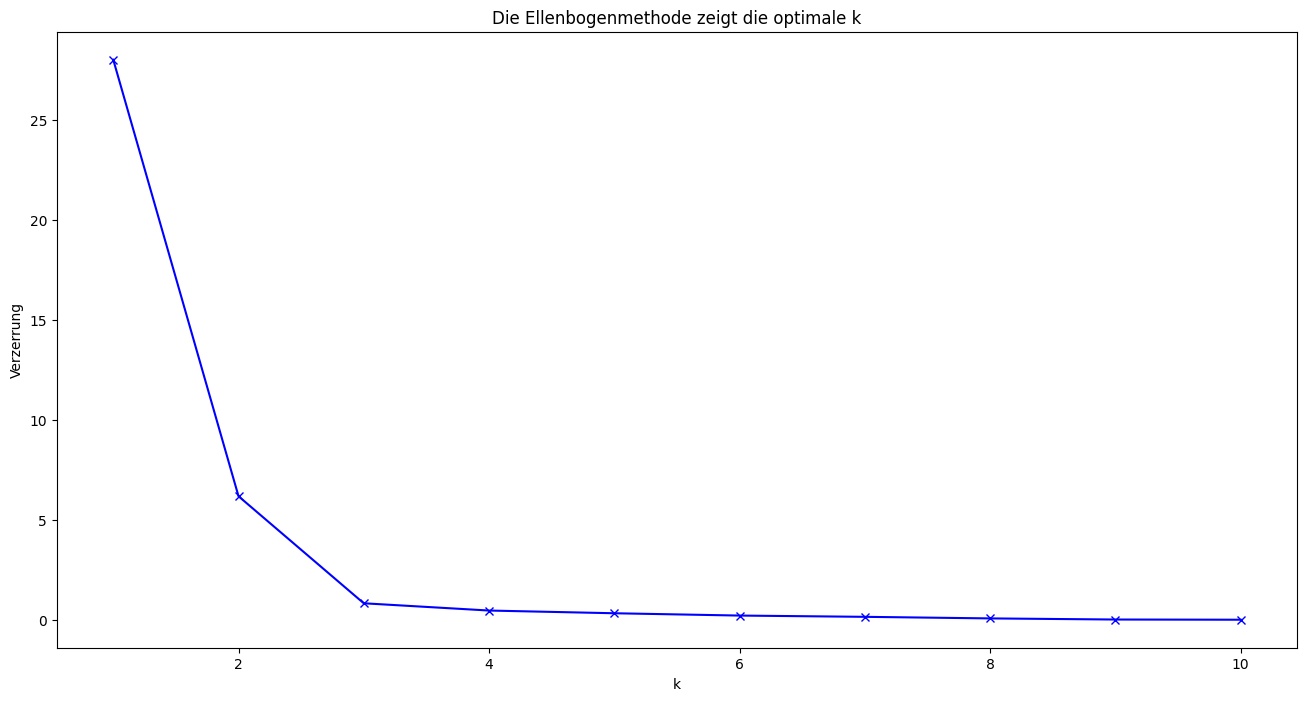

In [84]:
def Ellenbogenmethode(X, a, n):
    # Skalieren Sie die Daten
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Liste zur Speicherung der Verzerrungswerte
    verzerrung = []
    
    # Testen Sie verschiedene Werte von k
    K = range(a, n+1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10)
        kmeanModel.fit(X_scaled)
        verzerrung.append(kmeanModel.inertia_)
        print("Verzerrungswert: zu k="+str(k)+" ist "+str(kmeanModel.inertia_))
    
    # Zeichnen Sie die Verzerrungswerte
    plt.figure(figsize=(16,8))
    plt.plot(K, verzerrung, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Verzerrung')
    plt.title('Die Ellenbogenmethode zeigt die optimale k')
    plt.show()

Ellenbogenmethode(X, 1, 10)

In [95]:
clust.cluster_centers_

array([[ 0.91543243,  0.83199493],
       [-1.01714714, -1.34587416],
       [-0.76286036, -0.0611761 ]])

In [97]:
m1, m2, m3 = clust.cluster_centers_
print(m1)
print(m2)
print(m3)

[0.91543243 0.83199493]
[-1.01714714 -1.34587416]
[-0.76286036 -0.0611761 ]


Beispiel 8.

Die gegebenen Informationen beziehen sich auf den K-Means-Algorithmus, eine Methode zur Clusteranalyse in der Datenanalyse. 

1. **Datensatz E**: Der Datensatz `E_2` besteht aus 4 Punkten, die jeweils durch ein Paar von Koordinaten `(x1, x2)` repräsentiert werden.

2. **Zentroiden m1 und m2**: Zentroiden sind die Mittelpunkte der Cluster. In diesem Fall haben wir zwei Zentroiden `m1 = (6,1)` und `m2 = (6,2)`.

3. **Cluster-Funktion**: Die Cluster-Funktion weist jedem Datenpunkt `x` in `E` einen Zentroiden `mcluster(x)` zu. In diesem Fall werden die beiden unteren Punkte dem Cluster 1 (mit Zentroid `m1`) und die beiden oberen Punkte dem Cluster 2 (mit Zentroid `m2`) zugewiesen.

4. **Verzerrung dist**: Die Verzerrung ist ein Maß für die Gesamtstreuung der Datenpunkte um ihre jeweiligen Zentroiden. Sie wird berechnet als die Summe der quadrierten euklidischen Abstände jedes Datenpunkts von seinem zugeordneten Zentroiden. In diesem Fall beträgt die Verzerrung für das gegebene Clustering 16.

5. **Verschlechterung der Verzerrung**: Beachten Sie, dass wir diesen Wert beliebig verschlechtern können, indem wir beispielsweise die beiden rechten Punkte beliebig weiter nach rechts verschieben. Dies würde die Distanz dieser Punkte zu ihren Zentroiden erhöhen und somit die Gesamtverzerrung erhöhen.

Die Wahl des Clustering hängt von der spezifischen Anwendung ab, aber im Allgemeinen wird das Clustering mit der geringsten Verzerrung bevorzugt, da es die geringste Gesamtstreuung der Datenpunkte um ihre Zentroiden aufweist. 

Ich hoffe, das hilft! Lassen Sie mich wissen, wenn Sie weitere Fragen haben.

## 3.1.3. K-Means-Initialisierung <a name="3_1_3"></a>


In [ ]:
E_2 = pd.DataFrame({
    'x1': [2, 2, 10, 10],
    'x2': [1, 2, 1, 2]
})

**Beispiel 1: Film-DVDs**
   - `Kontext`: Sie betreiben ein Geschäft und verkaufen Film-DVDs.
   - `Ziel`: Aufteilung der Filme auf drei Regale, sodass Filme gleichen Genres zusammenstehen
   - `Herausforderung`: Keine weiteren Informationen zu den Filmen außer Spielzeit und Filmkosten


    length  costs
0      120    250
1       80     12
2      125    230
3      115     40
4       85     24
5      118    255
6      117     35
7       82      9
8       85     15
9      130    280
10     124    290
11     110     30
12      90     26
13     118    240


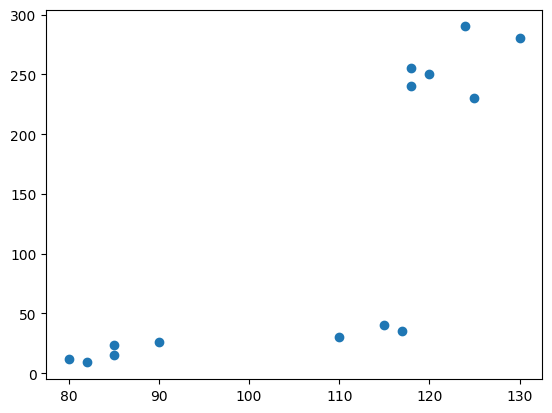

In [66]:
import pandas as pd

# Erstellen Sie den DataFrame
E_movies = pd.read_csv("./dataset/dataset_movies2.csv")

# Ausgabe des DataFrames
print(E_movies)

X = E_movies.values
plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

Eine Ausführung des Algorithmus $\text{KMEANS(Emovies,3)}$ führt zu den Clustern wie in der folgenden  Abbildung dargestellt. 

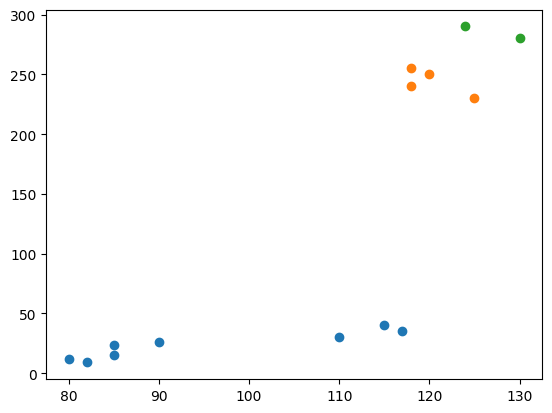

In [67]:
from sklearn.cluster import KMeans

clust_movies = KMeans(n_clusters=3,n_init=10).fit(X)
y_movies = clust_movies.predict(X)

plt.figure()

plt.scatter(X[y_movies==0].T[0], X[y_movies==0].T[1])
plt.scatter(X[y_movies==1].T[0], X[y_movies==1].T[1])
plt.scatter(X[y_movies==2].T[0], X[y_movies==2].T[1])

plt.show()

Dies entspricht nicht dem gewünschten Ergebnis. Insbesondere wurden alle Datenpunkte der beiden unteren Gruppen zu einem Cluster zusammengelegt. Das Problem liegt hier daran, dass das Merkmal Kosten auf einer größeren Skala (9–290 Mio. EUR) verteilt ist als das Merkmal Länge (80–130 Min.). Aus diesem Grund wirken sich Unterschiede im Merkmal Länge durch die Verwendung der euklidischen Distanz weniger signifikant aus als im Merkmal Kosten. 

In diesem Fall ist es sinnvoll, eine **Standardisierung**  der Daten zu machen: 

Sei $\hat{E}_{\text{movies}}$ der z-transformierte Datensatz zu $E_movies$. Eine Ausführung des Algorithmus $KMEANS(\hat{E}_{\text{movies}},3)$ führt zu den Clustern wie folgt dargestellt.

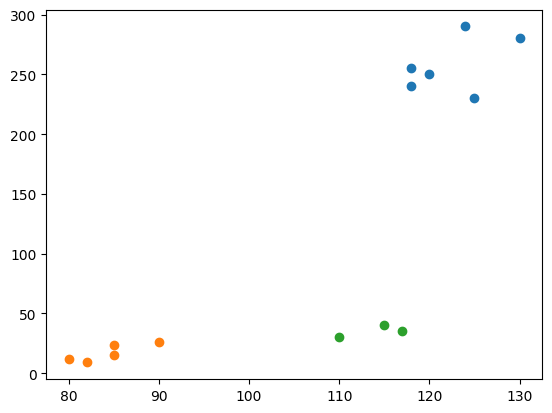

In [68]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

clust_movies = KMeans(n_clusters=3,n_init=10).fit(X_scaled)
y_movies = clust_movies.predict(X_scaled)

plt.figure()

plt.scatter(X[y_movies==0].T[0], X[y_movies==0].T[1])
plt.scatter(X[y_movies==1].T[0], X[y_movies==1].T[1])
plt.scatter(X[y_movies==2].T[0], X[y_movies==2].T[1])

plt.show()

Verzerrungswert: zu k=2 ist 6.1925735537681454
Verzerrungswert: zu k=3 ist 0.8458496812125974
Verzerrungswert: zu k=4 ist 0.483175252716736


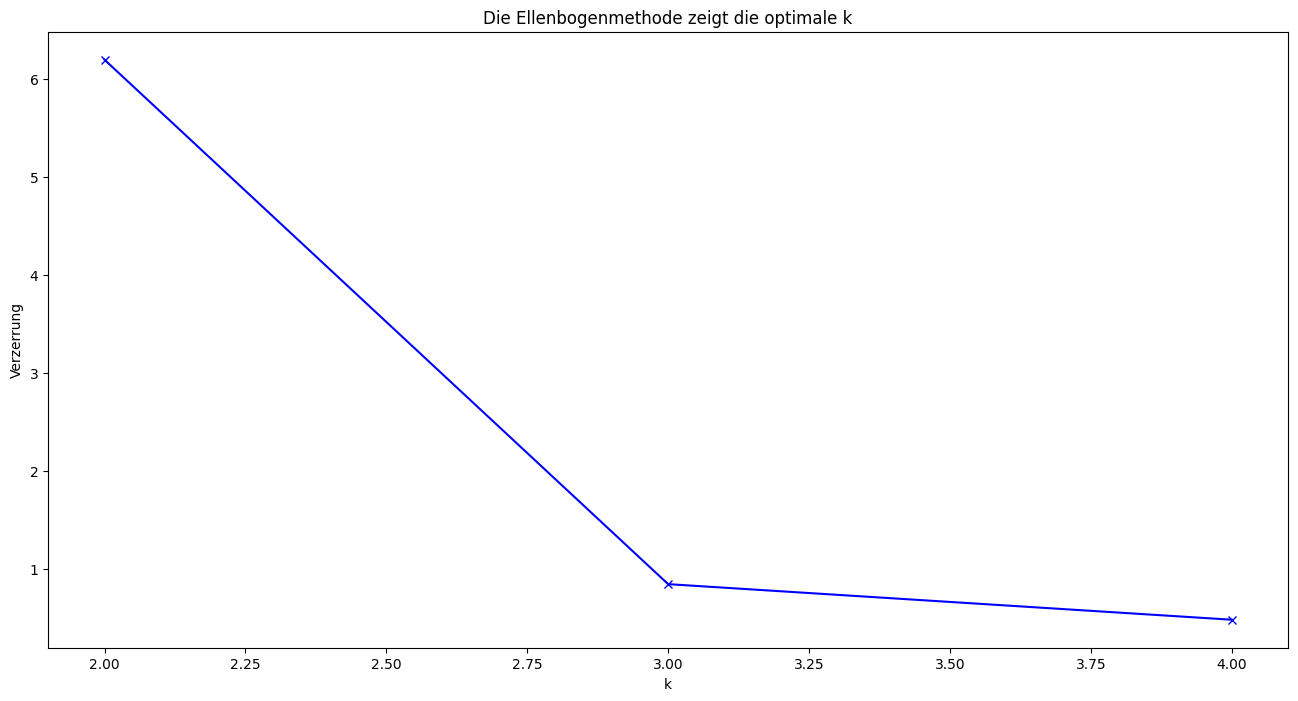

In [71]:
Ellenbogenmethode(X, 2, 4)

Das folgende Beispiel ist ein klassisches Beispiel für eine der wichtigsten Anwendungsdomänen des Clusterings,h der* Marktsegmentierun*g.
>**Beispiel 2: Ringgrößen** (Beispiel aus Kapitel 2.1.)
>   - `Kontext`: Rolle eines Juweliers, der Ringe verkauft. Wir haben Daten über Körpergröße und Ringfingerumfang einiger Personen, aber anders als in Beispiel 1 von Unterkapitel 2.1 interpretieren wir den Ringfingerumfang nicht als Zielvariable, sondern als ein weiteres Merkmal.
>   - `Ziel`: den Kunden 2, 3 oder maximal 4 verschiedenen Standardgrößen für Ringe anbieten, und nicht alle möglichen Größen.
>   - `Fragestellung`:
>      - Bestimmung einer geeigneten Unterteilung der Ringgrößen
>      - Auf wie viele Standardgrößen kann man sich einschränken, sodass die Kunden immer noch "zufrieden" sind?

   Koerpergroesse  Ringfingerumfang
0           153.3              47.1
1           158.9              46.8
2           160.8              49.3
3           179.6              53.2
4           156.6              47.7
5           165.1              49.0
6           165.9              50.6
7           156.7              47.1
8           167.8              51.7
9           160.8              47.8


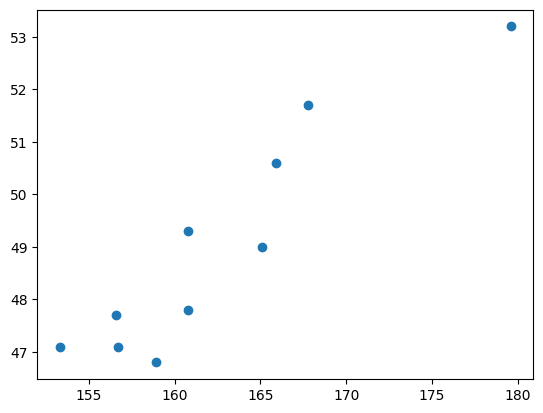

In [58]:
# Erstellen Sie den DataFrame
E_ring = pd.DataFrame({
    'Koerpergroesse': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'Ringfingerumfang': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
})

# Ausgabe des DataFrames
print(E_ring)
X = E_ring.values
X_scaled = StandardScaler().fit_transform(X)

plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

Die folgenden Abbildungen zeigen Clusterings für die Werte k = 2,3,4. 

2 Clusters haben eine Inertia von 5391.875
3 Clusters haben eine Inertia von 3062.375
4 Clusters haben eine Inertia von 825.5


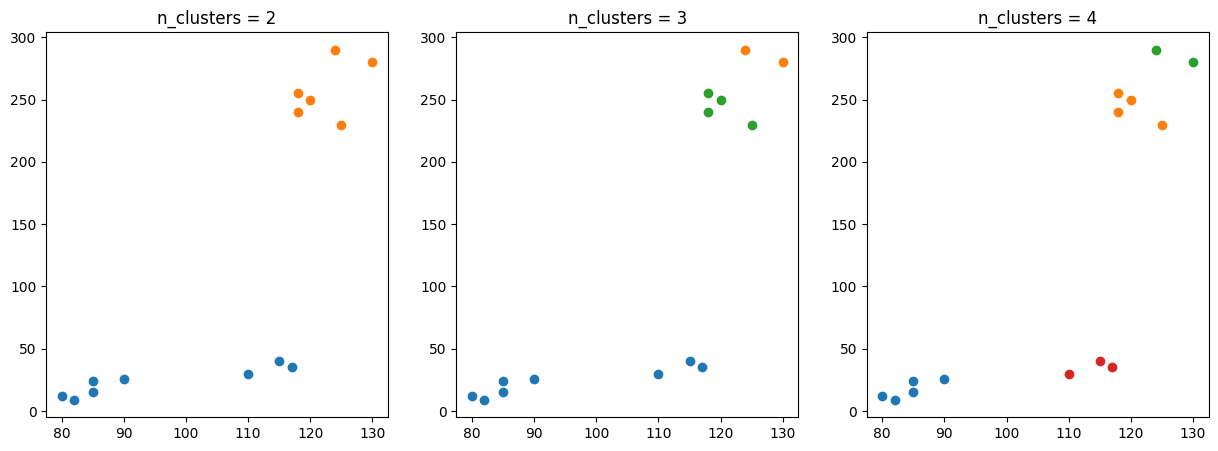

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Für n_clusters = 2
clust_ring_2 = KMeans(n_clusters=2, n_init=10).fit(X)
y = clust_ring_2.predict(X)
axs[0].scatter(X[y==0].T[0], X[y==0].T[1])
axs[0].scatter(X[y==1].T[0], X[y==1].T[1])
axs[0].set_title('n_clusters = 2')
print("2 Clusters haben eine Inertia von "+str(clust_ring_2.inertia_))

# Für n_clusters = 3
clust_ring_3 = KMeans(n_clusters=3, n_init=10).fit(X)
y = clust_ring_3.predict(X)
axs[1].scatter(X[y==0].T[0], X[y==0].T[1])
axs[1].scatter(X[y==1].T[0], X[y==1].T[1])
axs[1].scatter(X[y==2].T[0], X[y==2].T[1])
axs[1].set_title('n_clusters = 3')
print("3 Clusters haben eine Inertia von "+str(clust_ring_3.inertia_))

# Für n_clusters = 4
clust_ring_4 = KMeans(n_clusters=4, n_init=10).fit(X_scaled)
y = clust_ring_4.predict(X_scaled)
axs[2].scatter(X[y==0].T[0], X[y==0].T[1])
axs[2].scatter(X[y==1].T[0], X[y==1].T[1])
axs[2].scatter(X[y==2].T[0], X[y==2].T[1])
axs[2].scatter(X[y==3].T[0], X[y==3].T[1])
axs[2].set_title('n_clusters = 4')
print("4 Clusters haben eine Inertia von "+str(clust_ring_4.inertia_))

'''
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, n_clusters in enumerate([2, 3, 4]):
    clust = KMeans(n_clusters=n_clusters, n_init=10).fit(X)
    y = clust.predict(X)

    for j in range(n_clusters):
        axs[i].scatter(X[y==j].T[0], X[y==j].T[1])

    axs[i].set_title(f'n_clusters = {n_clusters}')

plt.show()

'''
plt.show()


Alle Clusterings erscheinen plausibel, gegeben der jeweiligen Anzahl an Clustern. Dennoch bleibt die Frage offen, welches dieser Clusterings wir als optimal betrachten (und damit welche Anzahl von Ringgrößen wir standardmäßig anbieten möchten). Diese Frage schauen wir uns in Abschnitt 3.1.2 genauer an.

Die Verzerrungswerte der drei Clusterings zu $(k = 2,3,4)$ berechnen sich zu ${dist$),${dist$),${dist$) mit$$\text{xt{dist2} &\approx 192.7$$ $$\\
\text{dist3} &\approx 53.$$,$$ \\
\text{dist4} &\approx 20$$.gn*}\]
Diese drei Werte und Verzerrungswerte zu weiteren mit K-Means berechneten Clusteri$gs zu ($k = 1$) und ($k = 5 ) sind
gram folgendenldung 14 darge

**stellt. Die optimale Anzahl an Clustern scheint h$er bei\$(k = 3\) zu** liegen.


Verzerrungswert: zu k=1 ist 20.000000000000007
Verzerrungswert: zu k=2 ist 5.98810477758334
Verzerrungswert: zu k=3 ist 2.3946339105999144
Verzerrungswert: zu k=4 ist 1.1259684023077372
Verzerrungswert: zu k=5 ist 0.7234305700587698


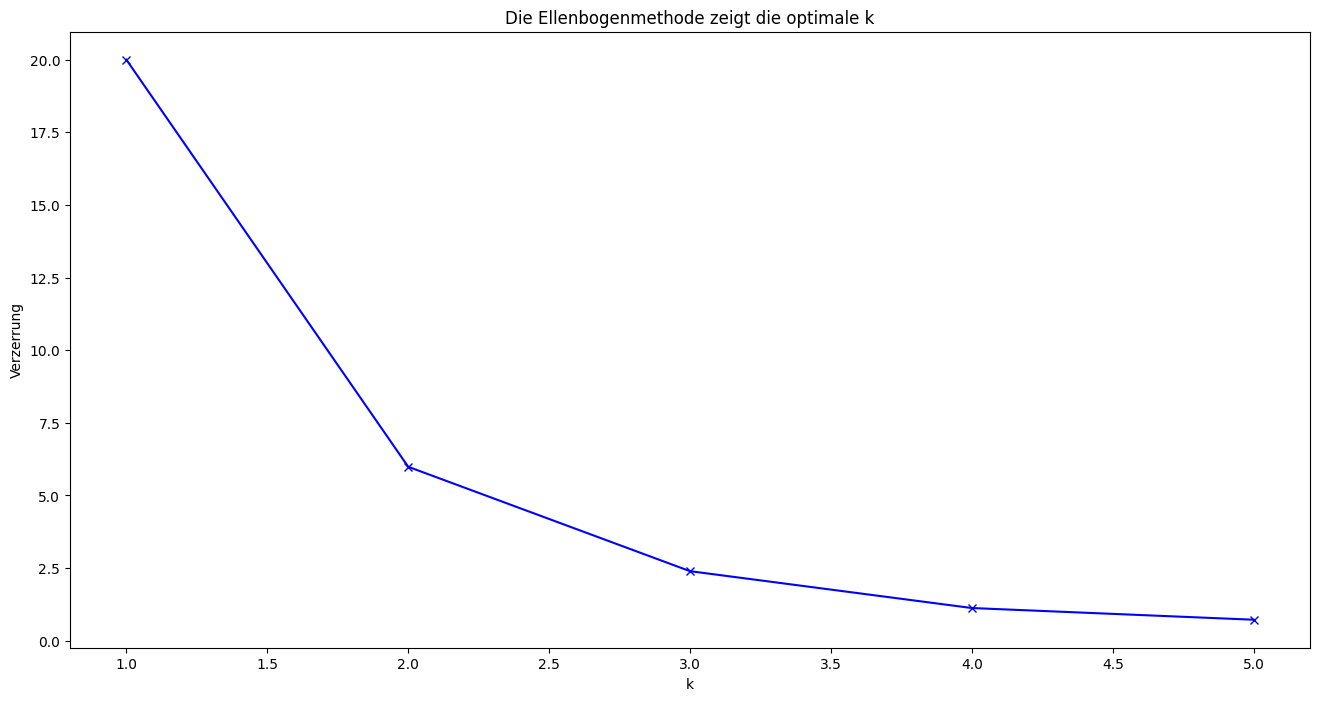

In [65]:
def Ellenbogenmethode(X, a, n):
    # Skalieren Sie die Daten
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Liste zur Speicherung der Verzerrungswerte
    verzerrung = []
    
    # Testen Sie verschiedene Werte von k
    K = range(a, n+1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10)
        kmeanModel.fit(X_scaled)
        verzerrung.append(kmeanModel.inertia_)
        print("Verzerrungswert: zu k="+str(k)+" ist "+str(kmeanModel.inertia_))
    
    # Zeichnen Sie die Verzerrungswerte
    plt.figure(figsize=(16,8))
    plt.plot(K, verzerrung, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Verzerrung')
    plt.title('Die Ellenbogenmethode zeigt die optimale k')
    plt.show()

Ellenbogenmethode(X, 1, 5)